In [13]:
import numpy as np
import pandas as pd

data = [
    [1900.0, 30.0, 4.0],
    [1901.0, 47.2, 6.1],
    [1902.0, 70.2, 9.8],
    [1903.0, 77.4, 35.2],
    [1904.0, 36.3, 59.4],
    [1905.0, 20.6, 41.7],
    [1906.0, 18.1, 19.0],
    [1907.0, 21.4, 13.0],
    [1908.0, 22.0, 8.3],
    [1909.0, 25.4, 9.1],
    [1910.0, 27.1, 7.4],
    [1911.0, 40.3, 8.0],
    [1912.0, 57.0, 12.3],
    [1913.0, 76.6, 19.5],
    [1914.0, 52.3, 45.7],
    [1915.0, 19.5, 51.1],
    [1916.0, 11.2, 29.7],
    [1917.0, 7.6, 15.8],
    [1918.0, 14.6, 9.7],
    [1919.0, 16.2, 10.1],
    [1920.0, 24.7, 8.6],
]

df = pd.DataFrame(data, columns=['Year', 'Hare', 'Lynx'])
df

,Year,Hare,Lynx
0,1900.0,30.0,4.0
1,1901.0,47.2,6.1
2,1902.0,70.2,9.8
3,1903.0,77.4,35.2
4,1904.0,36.3,59.4
5,1905.0,20.6,41.7
6,1906.0,18.1,19.0
7,1907.0,21.4,13.0
8,1908.0,22.0,8.3
9,1909.0,25.4,9.1


In [14]:
from sklearn.preprocessing import MinMaxScaler

features = df[['Hare', 'Lynx']].values

scaler = MinMaxScaler(feature_range=(0, 1))
features_normalized = scaler.fit_transform(features)


In [15]:
sequence_length = 3  

X = []
y = []

for i in range(len(features_normalized) - sequence_length):
    X.append(features_normalized[i:i+sequence_length])
    y.append(features_normalized[i+sequence_length])

X = np.array(X)
y = np.array(y)

In [16]:
train_size = int(len(X) * 0.7)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(2) 
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


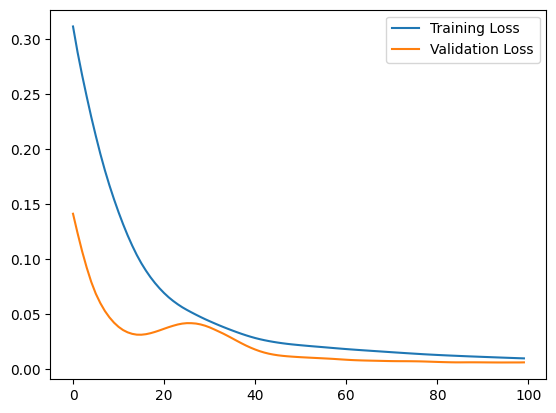

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [19]:
y_pred = model.predict(X)

y_pred_rescaled = y_pred
y_actual_rescaled = y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


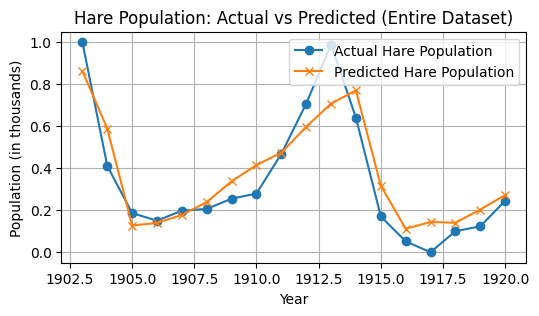

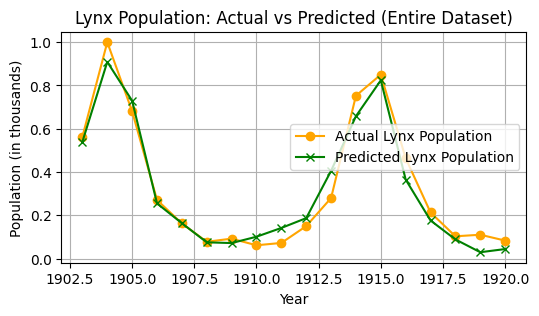

In [20]:
years = df['Year'].values[sequence_length:] 
plt.figure(figsize=(6, 3))
plt.plot(years, y_actual_rescaled[:, 0], label='Actual Hare Population', marker='o')
plt.plot(years, y_pred_rescaled[:, 0], label='Predicted Hare Population', marker='x')
plt.title('Hare Population: Actual vs Predicted (Entire Dataset)')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 3))
plt.plot(years, y_actual_rescaled[:, 1], label='Actual Lynx Population', marker='o', color='orange')
plt.plot(years, y_pred_rescaled[:, 1], label='Predicted Lynx Population', marker='x', color='green')
plt.title('Lynx Population: Actual vs Predicted (Entire Dataset)')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


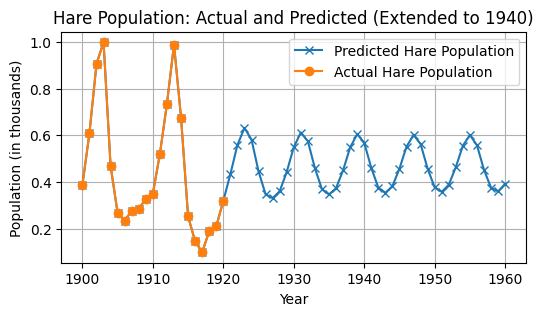

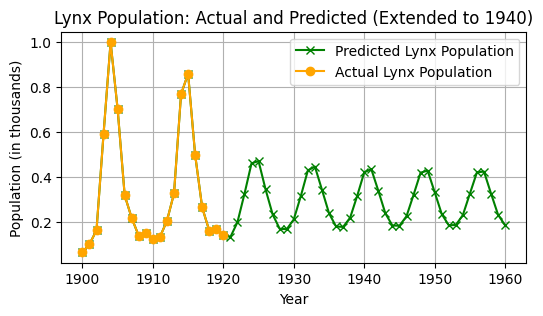

In [21]:
num_future_predictions = 40

last_sequence = features_normalized[-sequence_length:].tolist()

future_predictions_normalized = []

for i in range(num_future_predictions):
    input_sequence = np.array([last_sequence])
    
    next_prediction = model.predict(input_sequence)
    
    future_predictions_normalized.append(next_prediction[0])
    
    last_sequence.pop(0)
    last_sequence.append(next_prediction[0].tolist())

future_predictions_rescaled = scaler.inverse_transform(future_predictions_normalized)

last_year = df['Year'].iloc[-1]
future_years = [last_year + i + 1 for i in range(num_future_predictions)]

total_years = np.concatenate([df['Year'].values, future_years])
total_hare_population = np.concatenate([features[:, 0], future_predictions_rescaled[:, 0]])
total_lynx_population = np.concatenate([features[:, 1], future_predictions_rescaled[:, 1]])
hare_max = np.max(total_hare_population)
lynx_max = np.max(total_lynx_population)
total_hare_population = total_hare_population / hare_max
total_lynx_population = total_lynx_population / lynx_max

plt.figure(figsize=(6, 3))
plt.plot(total_years, total_hare_population, label='Predicted Hare Population', marker='x')
plt.plot(df['Year'], features[:, 0]/hare_max, label='Actual Hare Population', marker='o')
plt.title('Hare Population: Actual and Predicted (Extended to 1940)')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 3))
plt.plot(total_years, total_lynx_population, label='Predicted Lynx Population', marker='x', color='green')
plt.plot(df['Year'], features[:, 1]/lynx_max, label='Actual Lynx Population', marker='o', color='orange')
plt.title('Lynx Population: Actual and Predicted (Extended to 1940)')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')
plt.legend()
plt.grid(True)
plt.show()
